In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from calc_Tsys import TskySim, auto_data

In [95]:
data_8536.fits[(0,'E')][0].shape

(1510,)

In [67]:
hera_beam_file = '/home/shane/data/uv_beam_vivaldi.fits'

Tsky_sim = TskySim(Tsky_file = '/data4/shane/data/HERA_Tsky_vivaldi.npz', beam_file = hera_beam_file,
                  f_min=50.,f_max=250.)

In [68]:
Tsky_sim.build_model()

In [69]:
data_8536 = auto_data(data_dir='/data4/shane/data/2458536/', filestart='zen.*',
                         fileend='*HH.uvh5', autos_file='post_power_drop_autos.uvh5',f_min=50.,f_max=250.)
data_8536.build_model(Tsky_sim)

In [70]:
data_8536.fit_data(calc_fit_err=True)

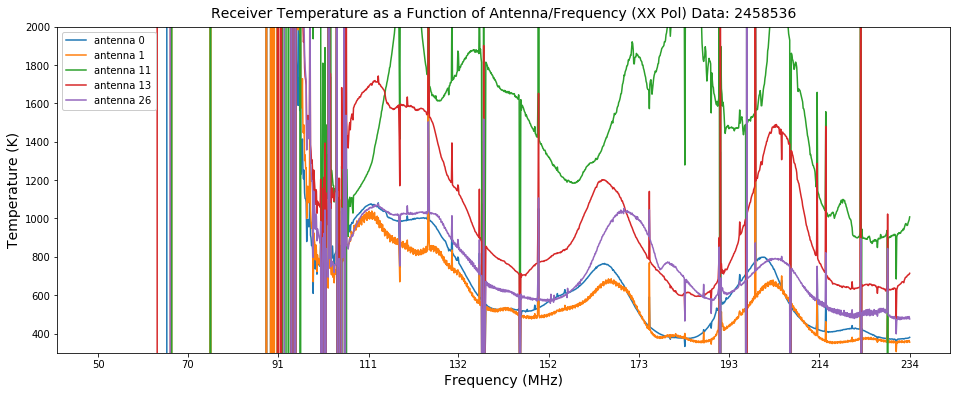

In [71]:
plt.figure(figsize = (16,6))
plt.plot(data_8536.Trxr[(0,'E')],label='antenna 0')
plt.plot(data_8536.Trxr[(1,'E')],label='antenna 1')
plt.plot(data_8536.Trxr[(11,'E')],label='antenna 11')
plt.plot(data_8536.Trxr[(13,'E')],label='antenna 13')
plt.plot(data_8536.Trxr[(26,'E')],label='antenna 26')
plt.ylim([3e2,2e3])
#plt.yscale('symlog')

plt.legend(loc = 'best', framealpha = 1)

x_ticks = np.linspace(0,1509,num=10,dtype=int)
plt.xticks(x_ticks,(np.around(data_8536.uv.freq_array[0,x_ticks]*1e-6)).astype(int))

plt.title('Receiver Temperature as a Function of Antenna/Frequency (XX Pol) Data: 2458536',size=14,verticalalignment='bottom')
plt.xlabel('Frequency (MHz)',size=14)
plt.ylabel('Temperature (K)',size=14)


plt.show()

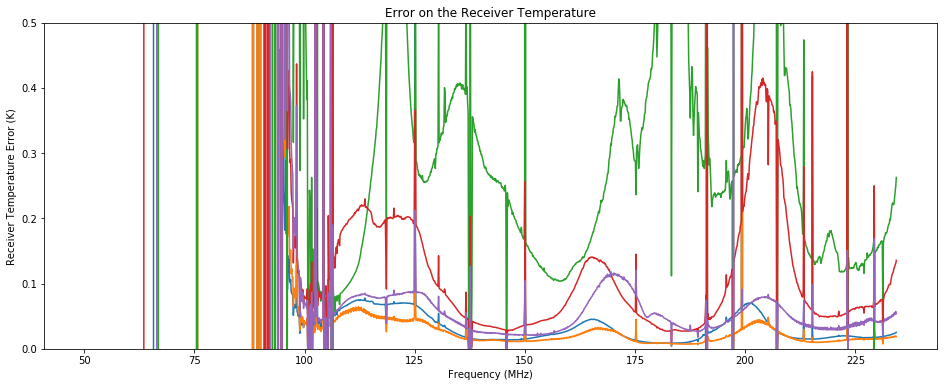

In [90]:
plt.figure(figsize = (16,6))
plt.plot(data_8536.freqs, data_8536.Trxr[(0,'E')]*data_8536.Trxr_err[(0,'E')],label='antenna 0')
plt.plot(data_8536.freqs, data_8536.Trxr[(1,'E')]*data_8536.Trxr_err[(1,'E')],label='antenna 1')
plt.plot(data_8536.freqs, data_8536.Trxr[(11,'E')]*data_8536.Trxr_err[(11,'E')],label='antenna 11')
plt.plot(data_8536.freqs, data_8536.Trxr[(13,'E')]*data_8536.Trxr_err[(13,'E')],label='antenna 13')
plt.plot(data_8536.freqs, data_8536.Trxr[(26,'E')]*data_8536.Trxr_err[(26,'E')],label='antenna 26')
#plt.yscale('log')
plt.ylim([0,0.5])
plt.ylabel('Receiver Temperature Error (K)')
plt.xlabel('Frequency (MHz)')
plt.title('Error on the Receiver Temperature')
plt.show()